Total points for this HW: 100.

Please note: **Copying and pasting other people's work is absolutely prohibited**. Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4
import warnings
warnings.filterwarnings('ignore')

## Task 1 (5+5+5+5+5=25 pts)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

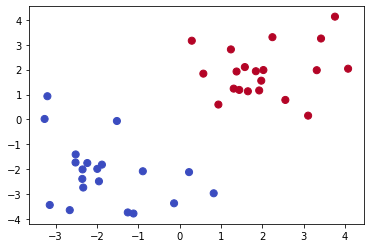

In [72]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

#### a. Report the separating hyperplane (line).

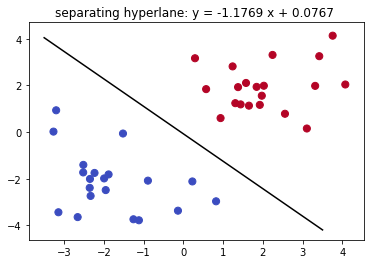

In [73]:
# your code here

from sklearn import svm

clf = svm.SVC(kernel='linear',C=100000)  
clf.fit(X, Y)

# get the separating hyperplane w[0] x1 + w[1] x2 + intercept = 0
# transform to slope-intercept form: x2 = (-w[0]/w[1])x1 - (intercept/w[1])
w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(-3.5, 3.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

plt.plot(x1, x2, 'k-')
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.title("separating hyperlane: y = %0.4f x + %0.4f " % (a, (clf.intercept_[0] / w[1])))
plt.show()

#### b. List the support vectors.

In [74]:
# your code here

print('The coordinates of the support vectors:\n\n'
      , clf.support_vectors_)

The coordinates of the support vectors:

 [[ 0.22627536 -2.11810965]
 [-1.5180363  -0.06399383]
 [ 0.93564585  0.5969359 ]]


#### c. Calculate the upper and lower hyperplanes (lines) of the margin.

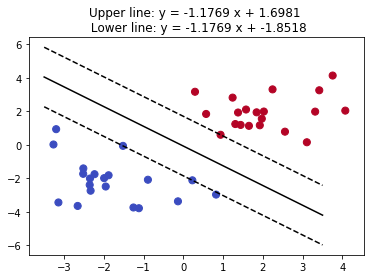

In [76]:
# your code here

v_down = clf.support_vectors_[0]
b_down = (v_down[1] - a * v_down[0])
x2_down = a * x1 + b_down

v_up = clf.support_vectors_[-1]
b_up = (v_up[1] - a * v_up[0])
x2_up = a * x1 + b_up

plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.axis('tight')

plt.title("Upper line: y = %0.4f x + %0.4f \n Lower line: y = %0.4f x + %0.4f" % (a, b_up, a, b_down))
plt.show()

#### d. Compute the width of the margin.

In [77]:
# your code here

# margin width = 2/||w||
2 / np.sqrt(np.sum(clf.coef_**2))

2.2977993504276433

In [78]:
# distance between parallel lines = |b2- b1| / sqrt(a**2 + 1)
abs(b_up-b_down) / np.sqrt(a**2 + 1)

2.2986070079527554

#### e. What would you expect to happen to the margin if the constant C was made very small?

Your answer here.  You can justify your intuitions with code if you'd like, but this is not required.

The slops of the upper and lower hyperplanes of the margin don't change, but the intercepts changed and the width become larger, which means the model is less accurate.

In [79]:
clf2 = svm.SVC(kernel='linear',C=0.001)  
clf2.fit(X, Y)
2/np.sqrt(np.sum(clf2.coef_**2))

17.927039242016377

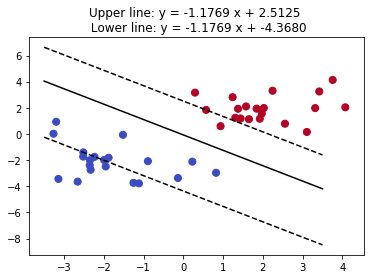

In [80]:
v_down = clf2.support_vectors_[0]; b_down = (v_down[1] - a * v_down[0]); x2_down = a * x1 + b_down

v_up = clf2.support_vectors_[-1]; b_up = (v_up[1] - a * v_up[0]); x2_up = a * x1 + b_up

plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.axis('tight')

plt.title("Upper line: y = %0.4f x + %0.4f \n Lower line: y = %0.4f x + %0.4f" % (a, b_up, a, b_down))
plt.show()

## Task 2 (4+8+8=20 pts)

### Given the dataset provided below, answer the following two questions:

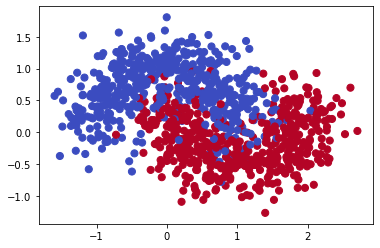

In [81]:
# Data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

In [84]:
# your code here

IS = []
OS = []
for i in range(10):

    clf = svm.SVC(kernel='poly') 
    clf.fit(X_train, Y_train)

    correct_is=1.0*(clf.predict(X_train)==np.asarray(Y_train)).sum()/len(Y_train)
    IS.append(correct_is)
    correct_os=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
    OS.append(correct_os)

print("Average in-sample classification accuracy: ",np.mean(IS)*100)
print("Average out-sample classification accuracy: ",np.mean(OS)*100)

Average in-sample classification accuracy:  85.67164179104478
Average out-sample classification accuracy:  86.66666666666669


### Next we will use the validation subset in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree.


When degree=1, max OS_vali=0.837838, and its C=0.662284.


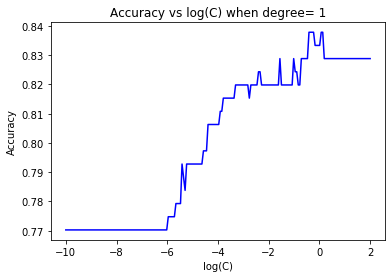

When degree=2, max OS_vali=0.743243, and its C=0.605009.


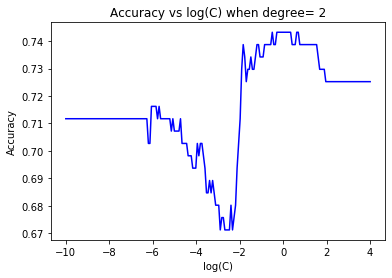

When degree=3, max OS_vali=0.873874, and its C=5.303366.


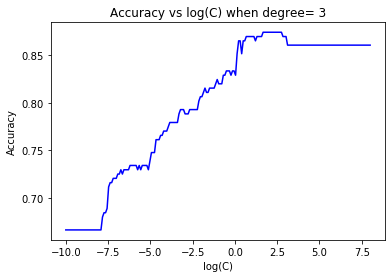

When degree=4, max OS_vali=0.725225, and its C=176381.053452.


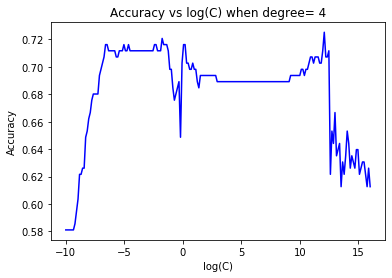

In [137]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

# your code here
import math

for degree in range(1, 5):
    
    C = [math.exp(i) for i in np.linspace(-10, 2**degree, 200)] 
    OS_vali=[]
    for c in C:
        clf = svm.SVC(kernel='poly', degree=degree, C=c) 
        clf.fit(X_train_1, Y_train_1)
    
        correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) # OS score for validation set
        OS_vali.append(correct)
        
    print("When degree=%d, max OS_vali=%f, and its C=%f." % (degree, max(OS_vali), C[np.argmax(OS_vali)]))
    
    C_log = list(np.log(C)) # better x-axis of graph
    
    plt.gca()
    plt.plot(C_log, OS_vali, 'b')
    plt.ylabel('Accuracy')
    plt.xlabel('log(C)')
    plt.title("Accuracy vs log(C) when degree= %d" % degree)
    plt.show()

### c. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected. 

In [139]:
# your code here

clf = svm.SVC(kernel='poly', C=5.303366, degree=3)
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print("Out-sample accuracy of the best classification model: {}".format((correct)*100))

Out-sample accuracy of the best classification model: 89.0909090909091


## Task 3 (5+5=10pts).

### This task is to be done by hand rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,no

SUV,red,domestic,no

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes


### a) Calculate the following sample probabilities:

P(Yes) = 6/11

P(No) = 5/11

P(Red|Yes) = 5/6

P(SUV|Yes) = 1/3

P(Domestic|Yes) = 1/2

P(Red|No) = 2/5

P(SUV|No) = 3/5

P(Domestic|No) = 3/5

### b) Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen? Show your work.

$ P(Yes|Red,Domestic,SUV) $

$ = \frac{P(Red,Domestic,SUV|Yes)P(Yes)}{P(Red,Domestic,SUV|Yes)P(Yes)+P(Red,Domestic,SUV|No)P(No)} $
 
$ = \frac{P(Red|Yes)P(Domestic|Yes)P(SUV|Yes)P(Yes)}{P(Red|Yes)P(Domestic|Yes)P(SUV|Yes)(Yes)+P(Red|No)P(Domestic|No)P(SUV|No)P(No)} $
 
$ = \frac{125}{233} = 0.5364$

## Task 4 (8+4+4+4=20pts)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [141]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

X_train.head()

,t_pre,glu,blood_p,triceps,serum,b_m,pedigree_f,age
0,3.0,158.0,64.0,13.0,387.0,31.2,0.295,24.0
1,0.0,84.0,64.0,22.0,66.0,35.8,0.545,21.0
2,9.0,120.0,72.0,22.0,56.0,20.8,0.733,48.0
3,4.0,110.0,76.0,20.0,100.0,28.4,0.118,27.0
4,2.0,100.0,66.0,20.0,90.0,32.9,0.867,28.0


### a) What is the prediction accuracy for Naive Bayes, both in sample (on the training data) and out of sample (on the test data)?

In [143]:
# your code here

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
trained_model = gnb.fit(X_train,y_train)
y_pred_train = trained_model.predict_proba(X_train)[:,1]
y_pred_test = trained_model.predict_proba(X_test)[:,1]

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))

In sample prediction accuracy: 0.7584745762711864
Out of sample prediction accuracy: 0.7911392405063291


### b) What is the prior probability of diabetes, learned from the training data?

In [146]:
# your code here

sum(y_train == 1)/len(y_train)

0.3008474576271186

### c) What is the mean and variance of each input variable for patients with diabetes?

In [154]:
# your code here

mean_var = pd.DataFrame(index = ['mean', 'varience'])
for i in X_train.columns:
    mean_var.loc['mean', i] = X_train[y_train==1][i].mean()
    mean_var.loc['varience', i] = X_train[y_train==1][i].var()

mean_var

,t_pre,glu,blood_p,triceps,serum,b_m,pedigree_f,age
mean,4.070423,144.140845,74.563380,33.478873,209.211268,35.223944,0.639042,35.788732
varience,12.380684,937.979879,190.420926,95.310262,16108.940443,39.168704,0.192758,105.340443


### d) What is the mean and variance of each input variable for patients without diabetes?

In [155]:
# your code here

mean_var = pd.DataFrame(index = ['mean', 'varience'])
for i in X_train.columns:
    mean_var.loc['mean', i] = X_train[y_train==0][i].mean()
    mean_var.loc['varience', i] = X_train[y_train==0][i].var()

mean_var

,t_pre,glu,blood_p,triceps,serum,b_m,pedigree_f,age
mean,2.690909,111.466667,69.206061,27.200000,127.006061,31.709091,0.468685,28.393939
varience,6.812417,609.689431,137.201183,108.929268,8369.713378,40.165344,0.085118,72.886548


## Task 5 (10+15=25 pts)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [157]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

In [158]:
X_Labeled_train

,0,1,2
0,4,6,6
1,2,2,2
2,2,6,2
3,6,6,6
4,1,2,2
5,3,4,4
6,6,1,6
7,1,3,1
8,5,1,6


In [159]:
y_Labeled_train

0    0
1    1
2    0
3    0
4    1
5    0
6    0
7    1
8    1
Name: y, dtype: int64

### a) Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy.

In [165]:
# your code here

# Training a binary Naive Bayes Classifier with discrete input attributes.
# Assume that the binary output variable takes on values 0 or 1. 
def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

naive_bayes_classifier = trainNaiveBayesDiscrete(X_Labeled_train,y_Labeled_train)
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

# measure accuracy of the predicted probabilities
print('Log-likelihood (test):',sum(np.log(y_pred_test*y_Labeled_test+(1-y_pred_test)*(1-y_Labeled_test))))

Out of sample prediction accuracy: 0.6944444444444444
Log-likelihood (test): -33.37603744193139


### b) Improve the classification by using the unlabeled data, data_Unlabeled, and the EM semi-supervised algorithm to predict the labels of X_Labeled_test, and report the new accuracy.

In [229]:
# your code here

def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    t = 0
    nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    
    while True:
        t = t + 1
        if t == num_iters:
            print("50 iterations finished.")
#         print('Iteration',t,'of',num_iters)
        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = testNaiveBayesDiscrete(X_Unlabeled,nbc)
        
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled]).reset_index(drop=True) # to avoid the duplicated indexes
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled]).reset_index(drop=True) # to avoid the duplicated indexes
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
                       
        if t==num_iters:
            break
            
    return nbc

In [230]:
naive_bayes_classifier=EM(X_Labeled_train,y_Labeled_train,X_Unlabeled_train,num_iters=50)
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

50 iterations finished.
Out of sample prediction accuracy: 0.9444444444444444
